# E2a: Küchentischversuch zum Laval-Rotor

Name: Thinh Nguyen
Datum: 07.01.24 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie stark unterscheiden sich die Schwingungen zwischen Handy und Subwoofer?


# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/versuch_handy.jpg.jpeg" width="500">

- Beschreibung des Aufbaus:

Wie in der Aufgabenstellung beschrieben wird der Beschleunigungssensor mit dem Raspberry Pi verbunden. Als nächstes wird der Beschleunigungssensor an den Versuchsgegenstand mit etwas Klebeband befestigt. In diesem Fall als erster Versuch das Handy (IPhone 11 Pro Max).

- Vorgangsbeschreibung: 

Hierbei wird die Vibration gemessen, die beim Auslösen eines Alarms verursacht wird.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240112_005257_ThinhNguyen_handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_005257_ThinhNguyen_handy.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240112_005257_ThinhNguyen_handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240112_005257_ThinhNguyen_handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240112_005257_ThinhNguyen_handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeadca1-8910-60f5-93bc-0cc06521517c": {
    "type": "probe",
    "name": "handy",
    "comment": "",
    "path": "measurement_data/data_2024

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
Pfad_1 = "measurement_data/data_20240112_005257_ThinhNguyen_handy"+"/"+"data_20240112_005257_ThinhNguyen_handy.h5"

file = h5py.File(Pfad_1, "r")

dataset = file["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]

data_acc_x = np.array(dataset["acceleration_x"])
data_acc_y = np.array(dataset["acceleration_y"])
data_acc_z = np.array(dataset["acceleration_z"])

timestamp = np.array(dataset["timestamp"])

print(data_acc_x)
print(data_acc_y)
print(data_acc_z)



[0.        0.        0.        ... 0.0392266 0.0392266 0.0392266]
[-1.8436502 -1.8436502 -1.8436502 ... -1.8828768 -1.8828768 -1.8436502]
[8.433719  8.433719  8.433719  ... 8.3944924 8.3944924 8.433719 ]


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
acceleration_betrag = get_vec_accel(data_acc_x, data_acc_y, data_acc_z)

print(acceleration_betrag)

[8.63288261 8.63288261 8.63288261 ... 8.60315445 8.60315445 8.63297173]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'Beschleunigung in m/s^2')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


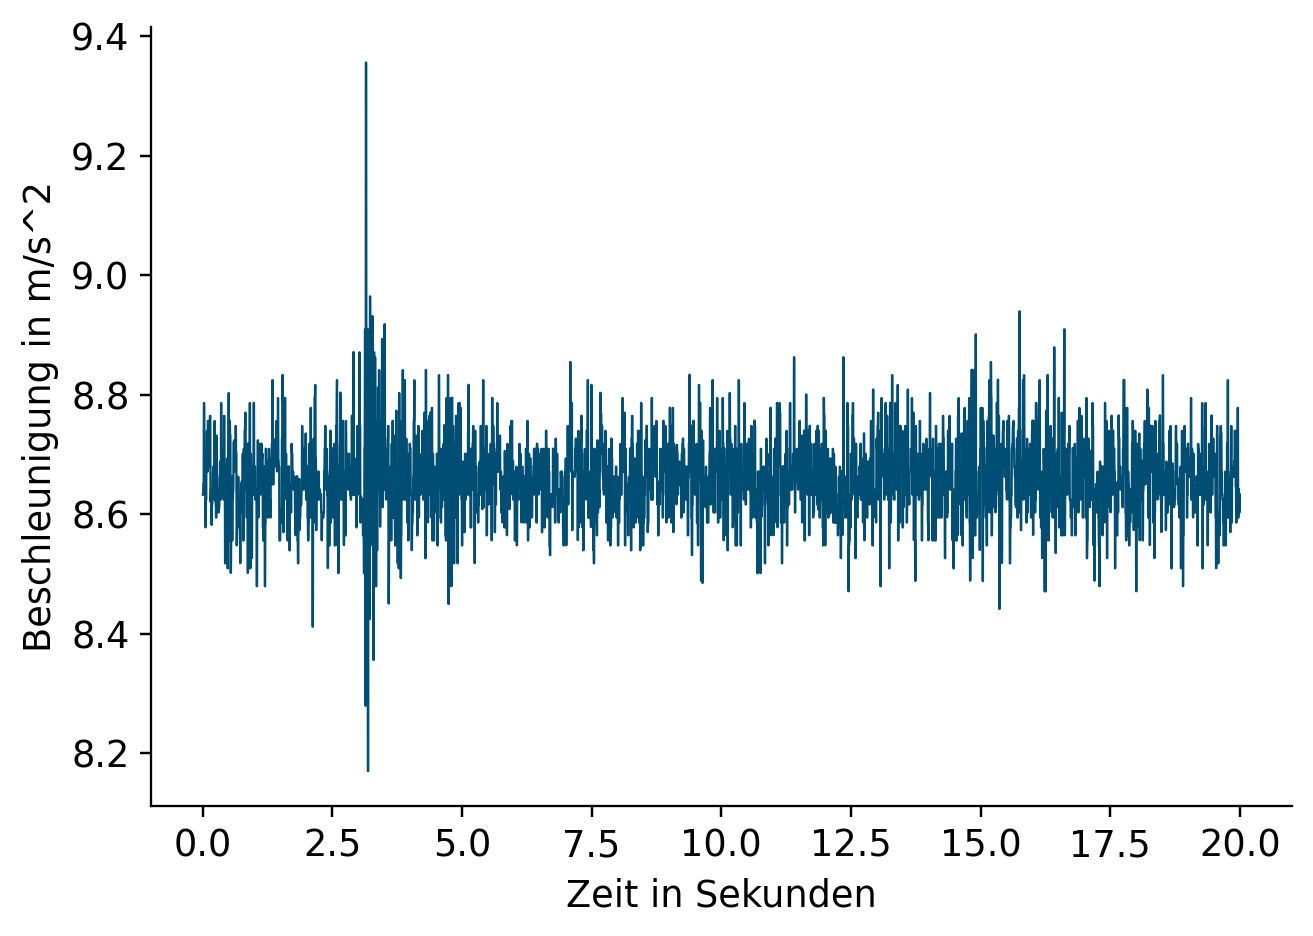

In [6]:
plt.plot(timestamp, acceleration_betrag)
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Beschleunigung in m/s^2")

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

aequidistante_zeit, data_interpolation = interpolation(timestamp, acceleration_betrag)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

Text(0, 0.5, 'Amplitude')

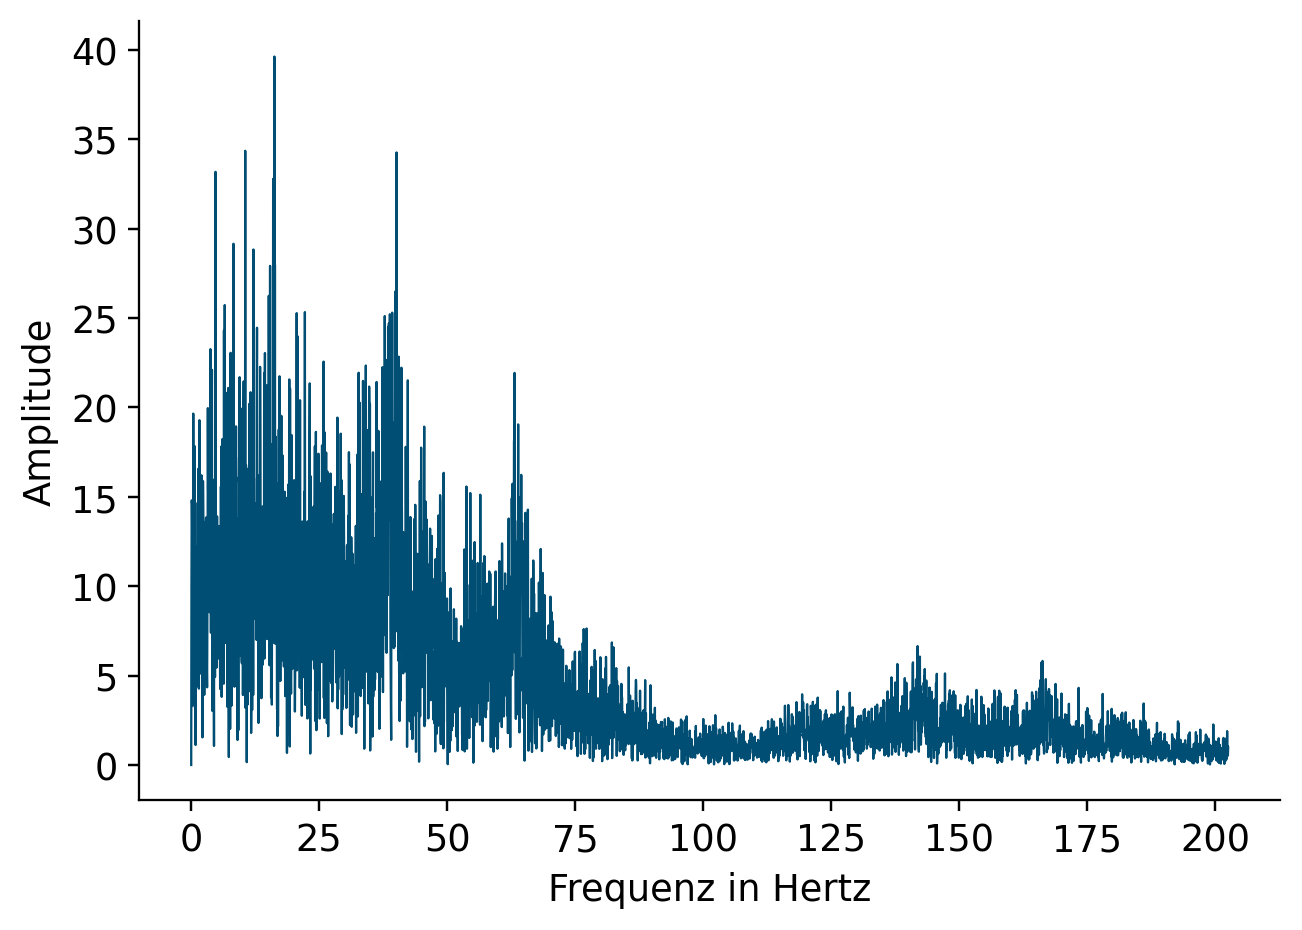

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

amplitude, frequenz = my_fft(data_interpolation, aequidistante_zeit)

plt.plot(frequenz, np.abs(amplitude))
plt.xlabel("Frequenz in Hertz")
plt.ylabel("Amplitude")

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/versuch_subwoofer.jpg.jpeg" width="500">

- Beschreibung des Aufbaus:

Wie in der Aufgabenstellung beschrieben wird der Beschleunigungssensor mit dem Raspberry Pi verbunden. Als nächstes wird der Beschleunigungssensor an den Versuchsgegenstand befestigt. In diesem Fall als zweiter Versuch der Subwoofer.

- Vorgangsbeschreibung:

Hierbei wird die Schwingung gemessen, während Musik (Lied: Heartburn by Tenseoh) abgespielt wird.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240112_171653_ThinhNguyen_subwoofer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_171653_ThinhNguyen_subwoofer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
Pfad_2 = "measurement_data/data_20240112_171653_ThinhNguyen_subwoofer"+"/"+"data_20240112_171653_ThinhNguyen_subwoofer.h5"

file = h5py.File(Pfad_2, "r")

dataset = file["RawData"]["1ee847be-fddd-6ee4-892a-68c4555b0981"]

data_acc_x = np.array(dataset["acceleration_x"])
data_acc_y = np.array(dataset["acceleration_y"])
data_acc_z = np.array(dataset["acceleration_z"])

timestamp = np.array(dataset["timestamp"])

print(data_acc_x)
print(data_acc_y)
print(data_acc_z)

[-8.3160392 -8.3160392 -8.3160392 ... -6.5508422 -6.5508422 -6.5508422]
[-6.276256  -6.276256  -6.276256  ... -6.9038816 -6.9038816 -6.9038816]
[ 0.1176798  0.1176798  0.1176798 ... 12.7878716 12.7878716 12.7878716]


#### 2. Betrag der Beschleunigung berechnen


In [11]:
acceleration_betrag = get_vec_accel(data_acc_x, data_acc_y, data_acc_z)

print(acceleration_betrag)

[10.4192968  10.4192968  10.4192968  ... 15.94072692 15.94072692
 15.94072692]


#### 3. Darstellung der Messdaten

Text(0, 0.5, 'Beschleunigung in m/s^2')

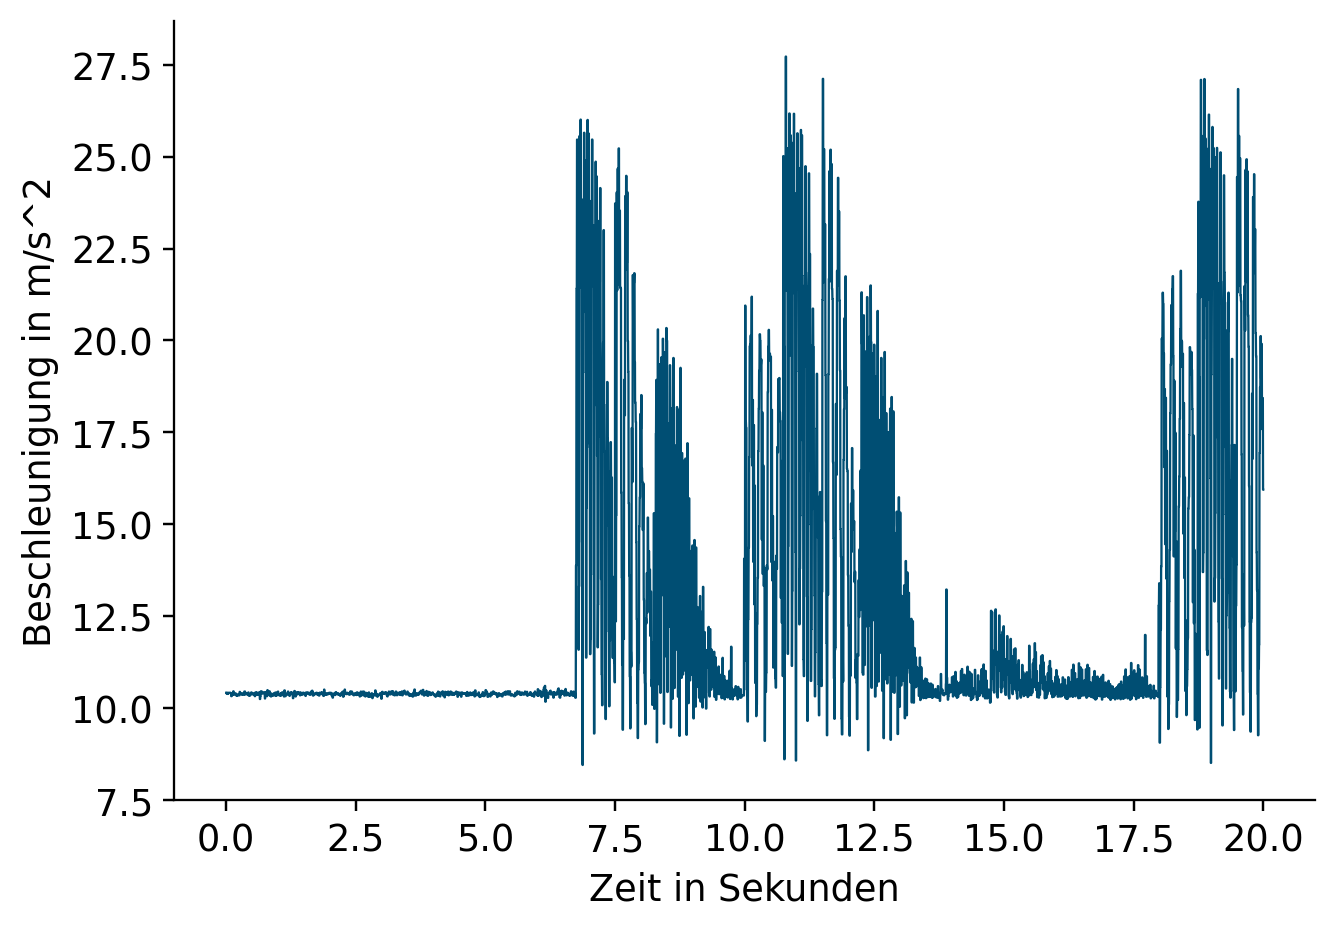

In [12]:
plt.plot(timestamp, acceleration_betrag)
plt.xlabel("Zeit in Sekunden")
plt.ylabel("Beschleunigung in m/s^2")

#### 4. Interpolation der Messwerte



In [13]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

aequidistante_zeit, data_interpolation = interpolation(timestamp, acceleration_betrag)

#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'Amplitude')

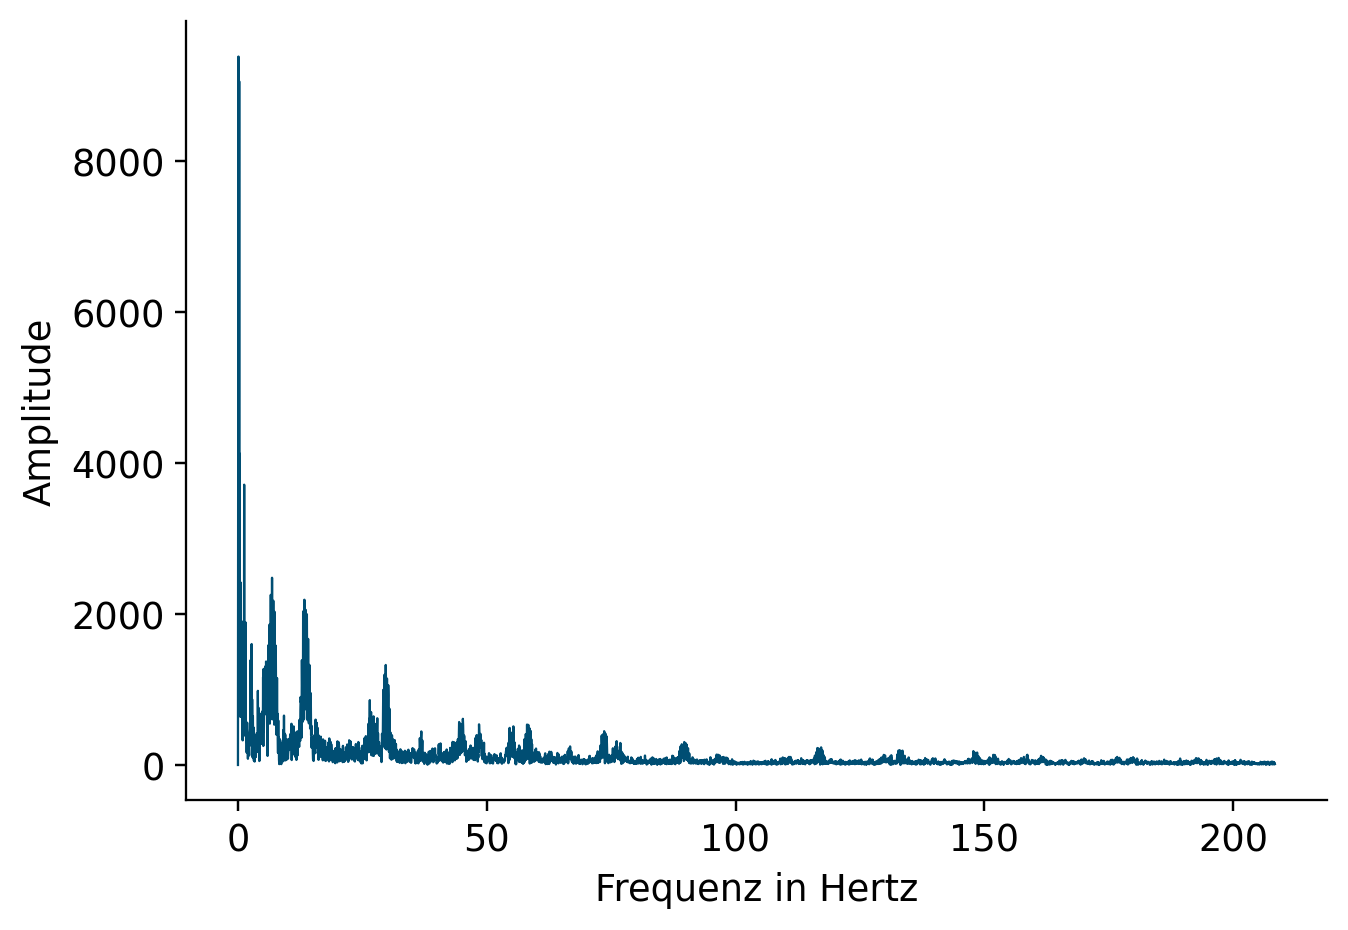

In [14]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

amplitude, frequenz = my_fft(data_interpolation, aequidistante_zeit)

plt.plot(frequenz, np.abs(amplitude))
plt.xlabel("Frequenz in Hertz")
plt.ylabel("Amplitude")

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Mit der Forschungsfrage werden hier die Schwingungen des Handys und des Subwoofers analysiert. Es lässt sich im Vorhinein vermuten, dass die Schwingungen die der Subwoofer ausgibt deutlich höher ist. Diese Hypothese bestätigt sich beim Plotten der Graphen. Der Subwoofer hat einen maximalen Beschleunigungswert von 27.5 m/s^2 und minimalen von 8 m/s^2. In den ersten 7 Sekunden hat er einen nahezu konstanten Beschleunigungswert von 10.5 27.5 m/s^2, da hier der Bass noch nicht eingesetzt hat.

Beim Handy hingegen bewegen sich die Beschleunigungswerte zwischen 8.4 und 9 m/s^2. Ausnahme hierbei ist bei ca. 3 Sekunden. In diesem Zeitpunkt wurde eine Nachricht empfangen und ein Ton ausgegeben.

Zusammmenfassend lässt sich sagen, dass sich die Beschleunigungswerte vom Subwoofer etwa verdoppelt haben im Hinblick auf die Werte vom Handy.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Versuch konnte mir einen guten Einblick in die Praxis geben, wie man den mit dem Beschleunigungssensor umgeht und ihn an den Raspberry Pi korrekt verkabelt. Zum Ende hin ist ein Problem beim Plotten des FFT aufgetaucht, welches ich beheben konnte.